In [1]:
import os
import sys

In [2]:
project_root=os.path.abspath(os.path.join(os.getcwd(),".."))

In [3]:
print(project_root)

d:\d_data\AnuragReddy_Naredla_python_data\python\data_science_concepts_github\LLMOPS\project3\automated-research-and-report-generation


In [4]:
sys.path.append(project_root)

In [5]:
print(project_root)

d:\d_data\AnuragReddy_Naredla_python_data\python\data_science_concepts_github\LLMOPS\project3\automated-research-and-report-generation


In [6]:

from research_and_analysts.utils.model_loader import ModelLoader

In [7]:
model_loader=ModelLoader()
llm=model_loader.load_llm()
result = llm.invoke("Hello, how are you?").content
print(result)

{"timestamp": "2025-10-25T09:00:25.094322Z", "level": "info", "event": "OPENAI_API_KEY loaded from environment"}
{"timestamp": "2025-10-25T09:00:25.098451Z", "level": "info", "event": "GOOGLE_API_KEY loaded from environment"}
{"timestamp": "2025-10-25T09:00:25.101461Z", "level": "info", "event": "GROQ_API_KEY loaded from environment"}
{"timestamp": "2025-10-25T09:00:25.103451Z", "level": "warning", "event": "ASTRA_DB_API_ENDPOINT is missing from environment"}
{"timestamp": "2025-10-25T09:00:25.105453Z", "level": "warning", "event": "ASTRA_DB_APPLICATION_TOKEN is missing from environment"}
{"timestamp": "2025-10-25T09:00:25.108460Z", "level": "warning", "event": "ASTRA_DB_KEYSPACE is missing from environment"}
{"config_keys": ["astra_db", "embedding_model", "retriever", "llm"], "timestamp": "2025-10-25T09:00:25.135361Z", "level": "info", "event": "YAML config loaded"}
{"provider": "groq", "model": "llama-3.3-70b-versatile", "timestamp": "2025-10-25T09:00:25.138346Z", "level": "info", "e

Hello. I'm just a language model, so I don't have feelings or emotions like humans do, but I'm functioning properly and ready to assist you with any questions or tasks you may have. How can I help you today?


In [8]:
from typing import List
from typing_extensions import TypedDict
from pydantic import BaseModel, Field

from langgraph.graph import StateGraph,START,END
from langchain_core.messages import AIMessage,HumanMessage,SystemMessage
from langgraph.checkpoint.memory import MemorySaver

from IPython.display import Image,display

**Workflow1**

In [9]:
class Analyst(BaseModel):
    name: str = Field(description="Name of the analyst.")
    role: str = Field(description="Role of the analyst in the context of the topic.")
    affiliation: str = Field(description="Primary affiliation of the analyst.")
    description: str = Field(description="Description of the analyst focus, concerns, and motives.")
    
    @property
    def persona(self) -> str:
        return f"Name: {self.name}\nRole: {self.role}\nAffiliation: {self.affiliation}\nDescription: {self.description}\n"

In [10]:
analyst = Analyst(name="Anurag Reddy", role="Data Scientist", affiliation="AI Research Lab", description="I am a developer")

In [11]:
analyst.name

'Anurag Reddy'

In [12]:
print(analyst.persona)

Name: Anurag Reddy
Role: Data Scientist
Affiliation: AI Research Lab
Description: I am a developer



In [13]:
class Perspective(BaseModel):
       analysts: List[Analyst] = Field(description="Comprehensive list of analysts with their roles and affiliations.")

In [14]:
class GenerateAnalystsState(TypedDict):
    topic: str #research topic
    max_analysts: int # number of analyst
    human_analyst_feedback: str # Human feedback
    analysts: List[Analyst] # Analyst asking questions

In [15]:
GenerateAnalystsState(topic="finance", max_analysts=5,human_analyst_feedback="Give the real info")

{'topic': 'finance',
 'max_analysts': 5,
 'human_analyst_feedback': 'Give the real info'}

In [16]:
analyst_instructions="""You are tasked with creating a set of AI analyst personas. Follow these instructions carefully:

1. First, review the research topic:
{topic}
        
2. Examine any editorial feedback that has been optionally provided to guide creation of the analysts: 
        
{human_analyst_feedback}
    
3. Determine the most interesting themes based upon documents and / or feedback above.
                    
4. Pick the top {max_analysts} themes.

5. Assign one analyst to each theme."""

In [17]:
print([analyst_instructions.format(
        topic="education",
        max_analysts=4,
        human_analyst_feedback="please exaplain only on AI"
        
        )] + ["Generate the set of analysts."])

['You are tasked with creating a set of AI analyst personas. Follow these instructions carefully:\n\n1. First, review the research topic:\neducation\n\n2. Examine any editorial feedback that has been optionally provided to guide creation of the analysts: \n\nplease exaplain only on AI\n\n3. Determine the most interesting themes based upon documents and / or feedback above.\n\n4. Pick the top 4 themes.\n\n5. Assign one analyst to each theme.', 'Generate the set of analysts.']


**['You are tasked with creating a set of AI analyst personas. Follow these instructions carefully:\n\n1. First, review the research topic:\neducation\n\n2. Examine any editorial feedback that has been optionally provided to guide creation of the analysts: \n\nplease exaplain only on AI\n\n3. Determine the most interesting themes based upon documents and / or feedback above.\n\n4. Pick the top 4 themes.\n\n5. Assign one analyst to each theme.', 'Generate the set of analysts.']**

In [18]:
def create_analyst(state:GenerateAnalystsState):
    """
    it is creating my analyst
    
    """
    topic = state["topic"]
    max_analysts = state["max_analysts"]
    human_analyst_feedback = state.get("human_analyst_feedback","")
    
    structured_llm = llm.with_structured_output(Perspective)
    
    #analyst_instructions is a prompt
    system_messages = analyst_instructions.format(
        topic=topic,
        max_analysts=max_analysts,
        human_analyst_feedback=human_analyst_feedback
        
        )
    analysts = structured_llm.invoke([SystemMessage(content=system_messages)]+ [HumanMessage(content="Generate the set of analysts.")])
    
    # Write the list of analysis to state
    return {"analysts": analysts.analysts}

def human_feedback(state):
    """ No-op node that should be interrupted on """
    pass

def should_continue(state):
    """ Return the next node to execute """
    human_analyst_feedback = state.get("human_analyst_feedback",None)
    if human_analyst_feedback:
        return "create_analyst"

In [19]:
create_analyst(
    {'topic': 'health',
    'max_analysts': 2,
    'human_analyst_feedback': 'give the real info'}
    )

HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"


{'analysts': [Analyst(name='Dr. Maria Rodriguez', role='Healthcare Expert', affiliation='World Health Organization', description='Focus on global health trends, concerns, and initiatives, with a motive to provide accurate and reliable information.'),
  Analyst(name='Dr. John Taylor', role='Medical Researcher', affiliation='National Institutes of Health', description='Concerned with the latest medical research and breakthroughs, with a focus on evidence-based information and a motive to advance healthcare knowledge.')]}

In [20]:
builder=StateGraph(GenerateAnalystsState)

builder.add_node("create_analyst",create_analyst)
builder.add_node("human_feedback", human_feedback)

builder.add_edge(START,"create_analyst")
builder.add_edge("create_analyst", "human_feedback")

builder.add_conditional_edges("human_feedback",should_continue,["create_analyst",END])



In [21]:
memory=MemorySaver()#Entire conversations will capture

In [22]:
graph=builder.compile(interrupt_before=["human_feedback"], checkpointer=memory)#before coclusion iam taking the human feedback

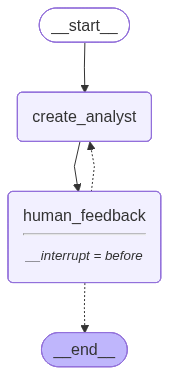

In [23]:
display(Image(graph.get_graph(xray=1).draw_mermaid_png()))

In [24]:

topic = "the benefits of adopting Langgraph as an agent framework"

In [25]:

max_analysts = 4

In [26]:
thread =  {"configurable":{"thread_id":1}}

In [27]:
for event in graph.stream({"topic":topic,
              "max_analysts":max_analysts},
             thread,
             stream_mode= "values"):
    analysts = event.get('analysts', '')
    
    if analysts:
        for analyst in analysts:
            print(f"Name: {analyst.name}")
            print(f"Affiliation: {analyst.affiliation}")
            print(f"Role: {analyst.role}")
            print(f"Description: {analyst.description}")
            print("-" * 50)  

HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"


Name: Dr. Rachel Kim
Affiliation: Stanford University
Role: AI Researcher
Description: Focuses on the technical benefits of Langgraph, such as improved agent performance and scalability.
--------------------------------------------------
Name: Dr. Liam Chen
Affiliation: Microsoft
Role: Software Engineer
Description: Examines the potential applications of Langgraph in real-world industries, including healthcare and finance.
--------------------------------------------------
Name: Dr. Ava Patel
Affiliation: MIT
Role: Cognitive Scientist
Description: Investigates the cognitive implications of using Langgraph, including its potential impact on human decision-making and bias.
--------------------------------------------------
Name: Dr. Julian Sanchez
Affiliation: McKinsey
Role: Business Strategist
Description: Evaluates the business case for adopting Langgraph, including its potential return on investment and competitive advantages.
--------------------------------------------------


In [28]:
state = graph.get_state(thread)

In [29]:
state

StateSnapshot(values={'topic': 'the benefits of adopting Langgraph as an agent framework', 'max_analysts': 4, 'analysts': [Analyst(name='Dr. Rachel Kim', role='AI Researcher', affiliation='Stanford University', description='Focuses on the technical benefits of Langgraph, such as improved agent performance and scalability.'), Analyst(name='Dr. Liam Chen', role='Software Engineer', affiliation='Microsoft', description='Examines the potential applications of Langgraph in real-world industries, including healthcare and finance.'), Analyst(name='Dr. Ava Patel', role='Cognitive Scientist', affiliation='MIT', description='Investigates the cognitive implications of using Langgraph, including its potential impact on human decision-making and bias.'), Analyst(name='Dr. Julian Sanchez', role='Business Strategist', affiliation='McKinsey', description='Evaluates the business case for adopting Langgraph, including its potential return on investment and competitive advantages.')]}, next=('human_feedb

In [30]:

state.next

('human_feedback',)

In [31]:
graph.update_state(thread,
                   {"human_analyst_feedback":"add something from the startup perspective and focus on the latest enterprise application"},as_node="human_feedback"
                   )

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0a7263-420f-6bda-8002-7cb9773456f9'}}

In [32]:
for event in graph.stream({"topic":topic,
              "max_analysts":max_analysts},
             thread,
             stream_mode= "values"):
    analysts = event.get('analysts', '')
    
    if analysts:
        for analyst in analysts:
            print(f"Name: {analyst.name}")
            print(f"Affiliation: {analyst.affiliation}")
            print(f"Role: {analyst.role}")
            print(f"Description: {analyst.description}")
            print("-" * 50)  

Name: Dr. Rachel Kim
Affiliation: Stanford University
Role: AI Researcher
Description: Focuses on the technical benefits of Langgraph, such as improved agent performance and scalability.
--------------------------------------------------
Name: Dr. Liam Chen
Affiliation: Microsoft
Role: Software Engineer
Description: Examines the potential applications of Langgraph in real-world industries, including healthcare and finance.
--------------------------------------------------
Name: Dr. Ava Patel
Affiliation: MIT
Role: Cognitive Scientist
Description: Investigates the cognitive implications of using Langgraph, including its potential impact on human decision-making and bias.
--------------------------------------------------
Name: Dr. Julian Sanchez
Affiliation: McKinsey
Role: Business Strategist
Description: Evaluates the business case for adopting Langgraph, including its potential return on investment and competitive advantages.
--------------------------------------------------


HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"


Name: Alex Chen
Affiliation: Langgraph Inc.
Role: Startup Founder
Description: Focuses on the benefits of adopting Langgraph as an agent framework for startups, highlighting its scalability and flexibility in enterprise applications.
--------------------------------------------------
Name: Dr. Rachel Kim
Affiliation: Gartner Research
Role: Enterprise Architect
Description: Examines the latest enterprise applications of Langgraph, emphasizing its potential to enhance business processes and improve decision-making.
--------------------------------------------------
Name: Maya Patel
Affiliation: Microsoft Azure
Role: Technical Lead
Description: Investigates the technical aspects of Langgraph, including its integration with cloud services and potential for machine learning enhancements.
--------------------------------------------------
Name: Ethan Hall
Affiliation: Deloitte Consulting
Role: Innovation Consultant
Description: Explores the innovative applications of Langgraph in various ind

**Workflow2**

In [33]:
from dotenv import load_dotenv
load_dotenv()

True

In [34]:
tavily_api_key=os.getenv("TAVILY_API_KEY")

In [35]:
from langchain_community.tools import TavilySearchResults
from langchain_community.document_loaders import WikipediaLoader

In [36]:
tavily_search = TavilySearchResults(tavily_api_key=tavily_api_key)
tavily_search.invoke("langraph")

C:\Users\Hp\AppData\Local\Temp\ipykernel_5200\342617490.py:1: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-tavily package and should be used instead. To use it run `pip install -U :class:`~langchain-tavily` and import as `from :class:`~langchain_tavily import TavilySearch``.
  tavily_search = TavilySearchResults(tavily_api_key=tavily_api_key)


[{'title': 'LangGraph Overview - Docs by LangChain',
  'url': 'https://docs.langchain.com/oss/python/langgraph/overview',
  'content': 'Trusted by companies shaping the future of agents - including Klarna, Replit, Elastic, and more - LangGraph is a low-level orchestration framework for building, managing, and deploying long-running, stateful agents.LangGraph is very low-level, and focused entirely on agent orchestration. Before using LangGraph, it is recommended you familiarize yourself with some of the components used to build agents, starting with models and tools. We will commonly use LangChain components throughout the [...] \u200b\n\nAcknowledgements\n\nLangGraph is inspired by Pregel and Apache Beam. The public interface draws inspiration from NetworkX. LangGraph is built by LangChain Inc, the creators of LangChain, but can be used without LangChain.\n\n  \n\nEdit the source of this page on GitHub\n\nWas this page helpful?\n\nYes No\n\nInstall\n\n⌘I\n\nAssistant\n\nResponses are 

In [37]:
docs=WikipediaLoader(query="langgraph").load()
print(docs[0].page_content[:500])

LangChain is a software framework that helps facilitate the integration of large language models (LLMs) into applications. As a language model integration framework, LangChain's use-cases largely overlap with those of language models in general, including document analysis and summarization, chatbots, and code analysis.


== History ==
LangChain was launched in October 2022 as an open source project by Harrison Chase, while working at machine learning startup Robust Intelligence. In April 2023, 


In [90]:
query="The benefits of adopting Langgraph as an agentic framework"

In [ ]:
docs=WikipediaLoader(query=query).load()#perform only with the keyword search
print(docs)

[]


In [ ]:
from langchain_community.utilities import WikipediaAPIWrapper#perform only with the keyword search
wiki=WikipediaAPIWrapper(doc_content_chars_max=4000)
docs=wiki.run(query)
print(docs)

No good Wikipedia Search Result was found


In [93]:
query1="AWS"
docs=WikipediaLoader(query=query1).load()#perform only with the keyword search
print(docs)

d:\d_data\AnuragReddy_Naredla_python_data\python\data_science_concepts_github\LLMOPS\project3\automated-research-and-report-generation\.venv\Lib\site-packages\wikipedia\wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file d:\d_data\AnuragReddy_Naredla_python_data\python\data_science_concepts_github\LLMOPS\project3\automated-research-and-report-generation\.venv\Lib\site-packages\wikipedia\wikipedia.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


[Document(metadata={'title': 'Amazon Web Services', 'summary': 'Amazon Web Services, Inc. (AWS) is a subsidiary of Amazon that provides on-demand cloud computing platforms and APIs to individuals, companies, and governments, on a metered, pay-as-you-go basis. Clients will often use this in combination with autoscaling (a process that allows a client to use more computing in times of high application usage, and then scale down to reduce costs when there is less traffic). These cloud computing web services provide various services related to networking, compute, storage, middleware, IoT and other processing capacity, as well as software tools via AWS server farms.  This frees clients from managing, scaling, and patching hardware and operating systems. \nOne of the foundational services is Amazon Elastic Compute Cloud (EC2), which allows users to have at their disposal a virtual cluster of computers, with extremely high availability, which can be interacted with over the internet via REST

In [94]:
from langchain_community.utilities import WikipediaAPIWrapper#perform only with the keyword search
wiki=WikipediaAPIWrapper(doc_content_chars_max=4000)
docs=wiki.run(query1)
print(docs)

d:\d_data\AnuragReddy_Naredla_python_data\python\data_science_concepts_github\LLMOPS\project3\automated-research-and-report-generation\.venv\Lib\site-packages\wikipedia\wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file d:\d_data\AnuragReddy_Naredla_python_data\python\data_science_concepts_github\LLMOPS\project3\automated-research-and-report-generation\.venv\Lib\site-packages\wikipedia\wikipedia.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Page: Amazon Web Services
Summary: Amazon Web Services, Inc. (AWS) is a subsidiary of Amazon that provides on-demand cloud computing platforms and APIs to individuals, companies, and governments, on a metered, pay-as-you-go basis. Clients will often use this in combination with autoscaling (a process that allows a client to use more computing in times of high application usage, and then scale down to reduce costs when there is less traffic). These cloud computing web services provide various services related to networking, compute, storage, middleware, IoT and other processing capacity, as well as software tools via AWS server farms.  This frees clients from managing, scaling, and patching hardware and operating systems. 
One of the foundational services is Amazon Elastic Compute Cloud (EC2), which allows users to have at their disposal a virtual cluster of computers, with extremely high availability, which can be interacted with over the internet via REST APIs, a CLI or the AWS consol

In [38]:
import operator
from typing import  Annotated
from langgraph.graph import MessagesState

class InterViewState(MessagesState):
    max_num_turns: int # Number turns of conversation
    context: Annotated[list, operator.add] # Source docs
    analyst: Analyst # Analyst asking questions
    interview: str # Interview transcript
    sections: list # Final key we duplicate in outer state for Send() API

class SearchQuery(BaseModel):
    search_query: str = Field(None, description="Search query for retrieval.")

In [39]:
question_instructions = """You are an analyst tasked with interviewing an expert to learn about a specific topic. 

Your goal is boil down to interesting and specific insights related to your topic.

1. Interesting: Insights that people will find surprising or non-obvious.
        
2. Specific: Insights that avoid generalities and include specific examples from the expert.

Here is your topic of focus and set of goals: {goals}
        
Begin by introducing yourself using a name that fits your persona, and then ask your question.

Continue to ask questions to drill down and refine your understanding of the topic.
        
When you are satisfied with your understanding, complete the interview with: "Thank you so much for your help!"

Remember to stay in character throughout your response, reflecting the persona and goals provided to you."""

In [40]:
print(analyst.persona)

Name: Ethan Hall
Role: Innovation Consultant
Affiliation: Deloitte Consulting
Description: Explores the innovative applications of Langgraph in various industries, such as healthcare and finance, and their potential to drive digital transformation.



In [41]:
question_instructions.format(goals = analyst.persona)

'You are an analyst tasked with interviewing an expert to learn about a specific topic. \n\nYour goal is boil down to interesting and specific insights related to your topic.\n\n1. Interesting: Insights that people will find surprising or non-obvious.\n\n2. Specific: Insights that avoid generalities and include specific examples from the expert.\n\nHere is your topic of focus and set of goals: Name: Ethan Hall\nRole: Innovation Consultant\nAffiliation: Deloitte Consulting\nDescription: Explores the innovative applications of Langgraph in various industries, such as healthcare and finance, and their potential to drive digital transformation.\n\n\nBegin by introducing yourself using a name that fits your persona, and then ask your question.\n\nContinue to ask questions to drill down and refine your understanding of the topic.\n\nWhen you are satisfied with your understanding, complete the interview with: "Thank you so much for your help!"\n\nRemember to stay in character throughout your 

**'You are an analyst tasked with interviewing an expert to learn about a specific topic. \n\nYour goal is boil down to interesting and specific insights related to your topic.\n\n1. Interesting: Insights that people will find surprising or non-obvious.\n\n2. Specific: Insights that avoid generalities and include specific examples from the expert.\n\nHere is your topic of focus and set of goals: Name: Ethan Taylor\nRole: Technical Analyst\nAffiliation: Tech Insights Inc.\nDescription: Delves into the technical aspects of Langgraph, assessing its performance, security, and integration capabilities, and providing recommendations for implementation.\n\n\nBegin by introducing yourself using a name that fits your persona, and then ask your question.\n\nContinue to ask questions to drill down and refine your understanding of the topic.\n\nWhen you are satisfied with your understanding, complete the interview with: "Thank you so much for your help!"\n\nRemember to stay in character throughout your response, reflecting the persona and goals provided to you.'**

In [42]:
def generation_question(state:InterViewState):#ask_question
    """Node to generate the questions"""
    
    #get state
    analyst = state["analyst"]#capture analyst
    messages = state["messages"]#capture messages
    
    #generate the question
    system_message = question_instructions.format(goals = analyst.persona)#capture que instruction
    question = llm.invoke([SystemMessage(content=system_message)]+messages)#passing to llm
    
    #returen the question through state
    return {"messages":[question]}

In [43]:
analyst

Analyst(name='Ethan Hall', role='Innovation Consultant', affiliation='Deloitte Consulting', description='Explores the innovative applications of Langgraph in various industries, such as healthcare and finance, and their potential to drive digital transformation.')

In [44]:
state = {"max_num_turns":2,"context":[],"analyst":analyst,"interview":"","section":[],
         "messages":[HumanMessage(content="hi do the proper search according to the experties")]}

In [45]:
state

{'max_num_turns': 2,
 'context': [],
 'analyst': Analyst(name='Ethan Hall', role='Innovation Consultant', affiliation='Deloitte Consulting', description='Explores the innovative applications of Langgraph in various industries, such as healthcare and finance, and their potential to drive digital transformation.'),
 'interview': '',
 'section': [],
 'messages': [HumanMessage(content='hi do the proper search according to the experties', additional_kwargs={}, response_metadata={})]}

In [46]:
result = generation_question(state)

HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 500 Internal Server Error"
Retrying request to /openai/v1/chat/completions in 0.438032 seconds
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"


In [47]:
result

{'messages': [AIMessage(content="Hello, my name is Rachel Kim, and I'm an analyst with a focus on emerging technologies. I'm excited to be speaking with Ethan Hall, an Innovation Consultant at Deloitte Consulting, to explore the innovative applications of Langgraph in various industries.\n\nEthan, thanks for taking the time to speak with me today. I'd love to dive right in and learn more about your work with Langgraph. Can you share a specific example of how Langgraph is being used in the healthcare industry to drive digital transformation? Perhaps a project or use case that you've worked on recently that you found particularly interesting or surprising?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 125, 'prompt_tokens': 240, 'total_tokens': 365, 'completion_time': 0.340588357, 'prompt_time': 0.021972343, 'queue_time': 0.041788697, 'total_time': 0.3625607}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_9e1e8f8435', 'service_tier': 

In [48]:
print(result["messages"][0].content)

Hello, my name is Rachel Kim, and I'm an analyst with a focus on emerging technologies. I'm excited to be speaking with Ethan Hall, an Innovation Consultant at Deloitte Consulting, to explore the innovative applications of Langgraph in various industries.

Ethan, thanks for taking the time to speak with me today. I'd love to dive right in and learn more about your work with Langgraph. Can you share a specific example of how Langgraph is being used in the healthcare industry to drive digital transformation? Perhaps a project or use case that you've worked on recently that you found particularly interesting or surprising?


In [49]:
from langchain_core.messages import get_buffer_string

In [50]:
# Search query writing
search_instructions = SystemMessage(content=f"""You will be given a conversation between an analyst and an expert. 
Your goal is to generate a well-structured query for use in retrieval and / or web-search related to the conversation. 
First, analyze the full conversation.
Pay particular attention to the final question posed by the analyst.
Convert this final question into a well-structured web search query""")

In [51]:
def search_web(state:InterViewState):
    """
    Retrieve data from the web
    """
    structure_llm = llm.with_structured_output(SearchQuery)
    search_query = structure_llm.invoke([search_instructions]+state["messages"])
    
    # Search
    search_docs = tavily_search.invoke(search_query.search_query)
    # Format
    formatted_search_docs = "\n\n---\n\n".join(
        [
            f'<Document href="{doc["url"]}"/>\n{doc["content"]}\n</Document>'
            for doc in search_docs
        ]
    )

    return {"context": [formatted_search_docs]}

In [52]:
state = {"max_num_turns":2,"context":[],"analyst":analyst,"interview":"","section":[],
         #above generated que passing here
         'messages': [AIMessage(content="Hello, my name is Rachel Kim, and I'm an analyst with a focus on emerging technologies. I'm excited to be speaking with Ethan Hall, an Innovation Consultant at Deloitte Consulting, to explore the innovative applications of Langgraph in various industries. Ethan, thanks for taking the time to speak with me today. I'd love to dive right in and learn more about your work with Langgraph. Can you share a specific example of how Langgraph is being used in the healthcare industry to drive digital transformation? Perhaps a project or use case that you've worked on recently that you found particularly interesting or surprising?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 79, 'prompt_tokens': 224, 'total_tokens': 303, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_cbf1785567', 'id': 'chatcmpl-CPRmMT7ufhFyYLhMtNpeguI9W2y6O', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--827b799b-ccb9-422c-a444-402d7ddc4550-0', usage_metadata={'input_tokens': 224, 'output_tokens': 79, 'total_tokens': 303, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}
result = search_web(state)
print(result["context"][0])

HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"


<Document href="https://www.ema.co/additional-blogs/addition-blogs/agentic-ai-transforming-digital-medicine"/>
LangGraph is a framework that facilitates the creation of sophisticated workflows powered by AI. In the Agentic Reasoning Doctor, LangGraph ensures that the system operates autonomously, orchestrating data flow, decisions, and actions. [...] AI-Driven Workflow Management: LangGraph allows for seamless interaction between various processes in the decision-making pipeline. This includes collecting patient data, running analyses, making treatment recommendations, and ensuring compliance with healthcare regulations.
 Adaptive Learning: LangGraph’s unique ability to adapt to new conditions ensures that the Agentic Reasoning Doctor evolves over time, improving its efficiency and accuracy with each interaction.

### 2. Neo4j (UMLS) [...] The Agentic Reasoning Doctor is an innovative clinical decision support system (CDSS) that integrates advanced technologies to assist healthcare pro

In [59]:
def search_wikipedia(state:InterViewState):
    """
    Retrieve data from wiki
    """
    # Search query
    structured_llm = llm.with_structured_output(SearchQuery)
    search_query = structured_llm.invoke([search_instructions]+state['messages'])
    
    print("*******************************")
    print(search_query)
    
    # Search
    search_docs = WikipediaLoader(query=search_query.search_query).load()

     # Format
    formatted_search_docs = "\n\n---\n\n".join(
        [
            f'<Document source="{doc.metadata["source"]}" page="{doc.metadata.get("page", "")}"/>\n{doc.page_content}\n</Document>'
            for doc in search_docs
        ]
    )

    return {"context": [formatted_search_docs]} 

In [61]:
state = {"max_num_turns":2,"context":[],"analyst":analyst,"interview":"","section":[],
         #above generated que passing here
         'messages': [AIMessage(content="Hello, my name is Rachel Kim, and I'm an analyst with a focus on emerging technologies. I'm excited to be speaking with Ethan Hall, an Innovation Consultant at Deloitte Consulting, to explore the innovative applications of Langgraph in various industries. Ethan, thanks for taking the time to speak with me today. I'd love to dive right in and learn more about your work with Langgraph. Can you share a specific example of how Langgraph is being used in the healthcare industry to drive digital transformation? Perhaps a project or use case that you've worked on recently that you found particularly interesting or surprising?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 79, 'prompt_tokens': 224, 'total_tokens': 303, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_cbf1785567', 'id': 'chatcmpl-CPRmMT7ufhFyYLhMtNpeguI9W2y6O', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--827b799b-ccb9-422c-a444-402d7ddc4550-0', usage_metadata={'input_tokens': 224, 'output_tokens': 79, 'total_tokens': 303, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}
result = search_wikipedia(state)
search_docs = WikipediaLoader(query='Langgraph applications in healthcare industry digital transformation',load_all_available_meta=True).load()
search_docs

HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"


*******************************
search_query='Langgraph applications in healthcare industry digital transformation'


[]

In [62]:
result

{'context': ['']}

In [63]:
answer_instructions = """You are an expert being interviewed by an analyst.

Here is analyst area of focus: {goals}. 
        
You goal is to answer a question posed by the interviewer.

To answer question, use this context:
        
{context}

When answering questions, follow these guidelines:
        
1. Use only the information provided in the context. 
        
2. Do not introduce external information or make assumptions beyond what is explicitly stated in the context.

3. The context contain sources at the topic of each individual document.

4. Include these sources your answer next to any relevant statements. For example, for source # 1 use [1]. 

5. List your sources in order at the bottom of your answer. [1] Source 1, [2] Source 2, etc
        
6. If the source is: <Document source="assistant/docs/llama3_1.pdf" page="7"/>' then just list: 
        
[1] assistant/docs/llama3_1.pdf, page 7 
        
And skip the addition of the brackets as well as the Document source preamble in your citation."""

In [64]:
def generate_answer(state:InterViewState):
   
    """ Node to answer a question """

    # Get state
    analyst = state["analyst"]
    messages = state["messages"]
    context = state["context"]

    # Answer question
    system_message = answer_instructions.format(goals=analyst.persona, context=context)
    answer = llm.invoke([SystemMessage(content=system_message)]+messages)
            
    # Name the message as coming from the expert
    answer.name = "expert"
    
    # Append it to state
    return {"messages": [answer]}

In [65]:
def route_messages(state: InterViewState, 
                   name: str = "expert"):

    """ Route between question and answer """
    
    # Get messages
    messages = state["messages"]
    max_num_turns = state.get('max_num_turns',2)

    # Check the number of expert answers 
    num_responses = len(
        [m for m in messages if isinstance(m, AIMessage) and m.name == name]
    )

    # End if expert has answered more than the max turns
    if num_responses >= max_num_turns:
        return 'save_interview'

    # This router is run after each question - answer pair 
    # Get the last question asked to check if it signals the end of discussion
    last_question = messages[-2]
    
    if "Thank you so much for your help" in last_question.content:
        return 'save_interview'
    
    return "ask_question"

In [66]:
def save_interview(state: InterViewState):
    
    """ Save interviews """

    # Get messages
    messages = state["messages"]
    
    # Convert interview to a string
    interview = get_buffer_string(messages)
    
    # Save to interviews key
    return {"interview": interview}

In [67]:
section_writer_instructions = """You are an expert technical writer. 
            
Your task is to create a short, easily digestible section of a report based on a set of source documents.

1. Analyze the content of the source documents: 
- The name of each source document is at the start of the document, with the <Document tag.
        
2. Create a report structure using markdown formatting:
- Use ## for the section title
- Use ### for sub-section headers
        
3. Write the report following this structure:
a. Title (## header)
b. Summary (### header)
c. Sources (### header)

4. Make your title engaging based upon the focus area of the analyst: 
{focus}

5. For the summary section:
- Set up summary with general background / context related to the focus area of the analyst
- Emphasize what is novel, interesting, or surprising about insights gathered from the interview
- Create a numbered list of source documents, as you use them
- Do not mention the names of interviewers or experts
- Aim for approximately 400 words maximum
- Use numbered sources in your report (e.g., [1], [2]) based on information from source documents
        
6. In the Sources section:
- Include all sources used in your report
- Provide full links to relevant websites or specific document paths
- Separate each source by a newline. Use two spaces at the end of each line to create a newline in Markdown.
- It will look like:

### Sources
[1] Link or Document name
[2] Link or Document name

7. Be sure to combine sources. For example this is not correct:

[3] https://ai.meta.com/blog/meta-llama-3-1/
[4] https://ai.meta.com/blog/meta-llama-3-1/

There should be no redundant sources. It should simply be:

[3] https://ai.meta.com/blog/meta-llama-3-1/
        
8. Final review:
- Ensure the report follows the required structure
- Include no preamble before the title of the report
- Check that all guidelines have been followed"""

In [68]:
def write_section(state: InterViewState):

    """ Node to answer a question """

    # Get state
    interview = state["interview"]
    context = state["context"]
    analyst = state["analyst"]
   
    # Write section using either the gathered source docs from interview (context) or the interview itself (interview)
    system_message = section_writer_instructions.format(focus=analyst.description)
    section = llm.invoke([SystemMessage(content=system_message)]+[HumanMessage(content=f"Use this source to write your section: {context}")]) 
                
    # Append it to state
    return {"sections": [section.content]}

In [69]:
interview_builder=StateGraph(InterViewState)

In [70]:

interview_builder.add_node("ask_question",generation_question)
interview_builder.add_node("search_web",search_web)
interview_builder.add_node("search_wikipedia",search_wikipedia)
interview_builder.add_node("generate_answer",generate_answer)
interview_builder.add_node("save_interview",save_interview)
interview_builder.add_node("write_section",write_section)

interview_builder.add_edge(START, "ask_question")
interview_builder.add_edge("ask_question","search_web")
interview_builder.add_edge("ask_question","search_wikipedia")
interview_builder.add_edge("search_web","generate_answer")
interview_builder.add_edge("search_wikipedia","generate_answer")
interview_builder.add_conditional_edges("generate_answer",
                           route_messages,
                           ["ask_question",
                            "save_interview"])
interview_builder.add_edge("save_interview","write_section")
interview_builder.add_edge("write_section",END)

In [71]:

interview_graph = interview_builder.compile(checkpointer=memory).with_config(run_name = "Conduct Interview")

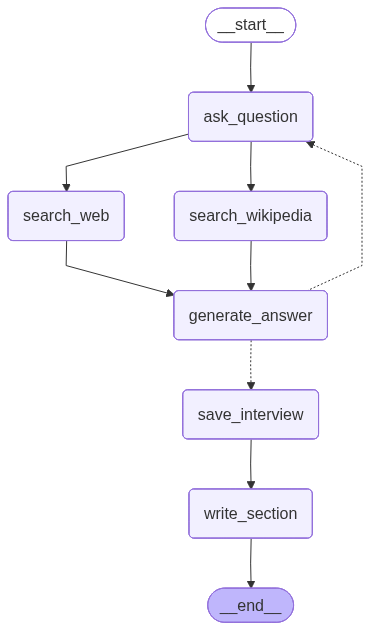

In [72]:
display(Image(interview_graph.get_graph().draw_mermaid_png()))

In [73]:
analyst

Analyst(name='Ethan Hall', role='Innovation Consultant', affiliation='Deloitte Consulting', description='Explores the innovative applications of Langgraph in various industries, such as healthcare and finance, and their potential to drive digital transformation.')

In [74]:
analyst.persona

'Name: Ethan Hall\nRole: Innovation Consultant\nAffiliation: Deloitte Consulting\nDescription: Explores the innovative applications of Langgraph in various industries, such as healthcare and finance, and their potential to drive digital transformation.\n'

In [75]:
thread = {"configurable": {"thread_id": "1"}}

In [76]:
from IPython.display import Markdown

In [77]:
messages = [HumanMessage("So you said you were writing an article on Langchain?")]

In [78]:
interview = interview_graph.invoke({"analyst": analyst, "messages": messages, "max_num_turns": 2}, thread)

HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"


*******************************
search_query='Langchain applications in healthcare and finance'


HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"


*******************************

HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"



search_query='Langchain applications in healthcare industry examples'


HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"


In [79]:
Markdown(interview['sections'][0])

## Exploring the Potential of LangChain in Healthcare and Finance
### Summary
The integration of LangChain in healthcare and finance has the potential to drive digital transformation by automating complex workflows, enhancing data analysis, and improving user interactions with domain-specific tools [1]. By leveraging large language models (LLMs) and retrieval-augmented generation, LangChain enables developers to build applications that process specialized information while maintaining accuracy and compliance [2]. In healthcare, LangChain can streamline processes such as analyzing electronic health records (EHRs) and patient triage, reducing manual workload while ensuring consistency [3]. In finance, LangChain can automate compliance checks, fraud detection, and customer service, allowing for more efficient and personalized experiences [4]. The following sources provide insights into the applications of LangChain in these industries:
1. https://milvus.io/ai-quick-reference/how-can-langchain-be-used-in-healthcare-or-finance-applications
2. https://zilliz.com/ai-faq/how-can-langchain-be-used-in-healthcare-or-finance-applications
3. https://www.designveloper.com/blog/langchain-use-cases/
4. https://www.invene.com/blog/langchain-turning-llm-predictions-into-structured-execution-for-healthcare
5. https://medium.com/@ThinkingLoop/langchain-in-healthcare-hipaa-nightmares-nobody-mentions-dc1c44dc2edf
6. https://www.swiftorial.com/tutorials/artificial_intelligence/langchain/case_studies/langchain_in_finance
7. https://www.linkedin.com/pulse/exploring-potential-langchain-finance-industry-syed-ali-faizan-qihye

### Sources
[1] https://milvus.io/ai-quick-reference/how-can-langchain-be-used-in-healthcare-or-finance-applications  
[2] https://zilliz.com/ai-faq/how-can-langchain-be-used-in-healthcare-or-finance-applications  
[3] https://www.designveloper.com/blog/langchain-use-cases/  
[4] https://www.invene.com/blog/langchain-turning-llm-predictions-into-structured-execution-for-healthcare  
[5] https://medium.com/@ThinkingLoop/langchain-in-healthcare-hipaa-nightmares-nobody-mentions-dc1c44dc2edf  
[6] https://www.swiftorial.com/tutorials/artificial_intelligence/langchain/case_studies/langchain_in_finance  
[7] https://www.linkedin.com/pulse/exploring-potential-langchain-finance-industry-syed-ali-faizan-qihye

**workflow3**

In [96]:
from langgraph.types import Send

In [97]:
class ResearchGraphState(TypedDict):
    topic: str # Research topic
    max_analysts: int # Number of analysts
    human_analyst_feedback: str # Human feedback
    analysts: List[Analyst] # Analyst asking questions
    sections: Annotated[list, operator.add] # Send() API key
    introduction: str # Introduction for the final report
    content: str # Content for the final report
    conclusion: str # Conclusion for the final report
    final_report: str # Final report


In [98]:
def initiate_all_interviews(state:ResearchGraphState):
    """ This is the "map" step where we run each interview sub-graph using Send API """ 
    
    #check if human feedback
    human_analyst_feedback=state.get('human_analyst_feedback')
    if human_analyst_feedback:
        # Return to create_analysts
        return "create_analysts"
    
    # Otherwise kick off interviews in parallel via Send() API
    else:
        topic = state["topic"]
        return [Send("conduct_interview", {"analyst": analyst,
                                        "messages": [HumanMessage(
                                            content=f"So you said you were writing an article on {topic}?"
                                        )
                                                ]}) for analyst in state["analysts"]]

In [105]:
report_writer_instructions = """You are a technical writer creating a report on this overall topic: 

{topic}
    
You have a team of analysts. Each analyst has done two things: 

1. They conducted an interview with an expert on a specific sub-topic.
2. They write up their finding into a memo.

Your task: 

1. You will be given a collection of memos from your analysts.
2. Think carefully about the insights from each memo.
3. Consolidate these into a crisp overall summary that ties together the central ideas from all of the memos. 
4. Summarize the central points in each memo into a cohesive single narrative.

To format your report:
 
1. Use markdown formatting. 
2. Include no pre-amble for the report.
3. Use no sub-heading. 
4. Start your report with a single title header: ## Insights
5. Do not mention any analyst names in your report.
6. Preserve any citations in the memos, which will be annotated in brackets, for example [1] or [2].
7. Create a final, consolidated list of sources and add to a Sources section with the `## Sources` header.
8. List your sources in order and do not repeat.

[1] Source 1
[2] Source 2

Here are the memos from your analysts to build your report from: 

{context}"""

In [106]:
def write_report(state: ResearchGraphState):
    # Full set of sections
    sections = state["sections"]
    topic = state["topic"]

    # Concat all sections together
    formatted_str_sections = "\n\n".join([f"{section}" for section in sections])
    
    # Summarize the sections into a final report
    system_message = report_writer_instructions.format(topic=topic, context=formatted_str_sections)    
    report = llm.invoke([SystemMessage(content=system_message)]+[HumanMessage(content=f"Write a report based upon these memos.")]) 
    return {"content": report.content}

In [107]:
intro_conclusion_instructions = """You are a technical writer finishing a report on {topic}

You will be given all of the sections of the report.

You job is to write a crisp and compelling introduction or conclusion section.

The user will instruct you whether to write the introduction or conclusion.

Include no pre-amble for either section.

Target around 100 words, crisply previewing (for introduction) or recapping (for conclusion) all of the sections of the report.

Use markdown formatting. 

For your introduction, create a compelling title and use the # header for the title.

For your introduction, use ## Introduction as the section header. 

For your conclusion, use ## Conclusion as the section header.

Here are the sections to reflect on for writing: {formatted_str_sections}"""

In [108]:
def write_introduction(state: ResearchGraphState):
    # Full set of sections
    sections = state["sections"]
    topic = state["topic"]

    # Concat all sections together
    formatted_str_sections = "\n\n".join([f"{section}" for section in sections])
    
    # Summarize the sections into a final report
    
    instructions = intro_conclusion_instructions.format(topic=topic, formatted_str_sections=formatted_str_sections)    
    intro = llm.invoke([instructions]+[HumanMessage(content=f"Write the report introduction")]) 
    return {"introduction": intro.content}

In [109]:
def write_conclusion(state: ResearchGraphState):
    # Full set of sections
    sections = state["sections"]
    topic = state["topic"]

    # Concat all sections together
    formatted_str_sections = "\n\n".join([f"{section}" for section in sections])
    
    # Summarize the sections into a final report
    
    instructions = intro_conclusion_instructions.format(topic=topic, formatted_str_sections=formatted_str_sections)    
    conclusion = llm.invoke([instructions]+[HumanMessage(content=f"Write the report conclusion")]) 
    return {"conclusion": conclusion.content}

In [101]:
def write_conclusion(stae:ResearchGraphState):
    # Full set of sections
    sections = state["sections"]
    topic = state["topic"]

    # Concat all sections together
    formatted_str_sections = "\n\n".join([f"{section}" for section in sections])
    
    # Summarize the sections into a final report
    
    instructions = intro_conclusion_instructions.format(topic=topic, formatted_str_sections=formatted_str_sections)    
    conclusion = llm.invoke([instructions]+[HumanMessage(content=f"Write the report conclusion")]) 
    return {"conclusion": conclusion.content}

In [110]:
def finalize_report(state: ResearchGraphState):
    """ The is the "reduce" step where we gather all the sections, combine them, and reflect on them to write the intro/conclusion """
    # Save full final report
    content = state["content"]
    if content.startswith("## Insights"):
        content = content.strip("## Insights")
    if "## Sources" in content:
        try:
            content, sources = content.split("\n## Sources\n")
        except:
            sources = None
    else:
        sources = None

    final_report = state["introduction"] + "\n\n---\n\n" + content + "\n\n---\n\n" + state["conclusion"]
    if sources is not None:
        final_report += "\n\n## Sources\n" + sources
    return {"final_report": final_report}

In [ ]:
# Add nodes and edges 
builder = StateGraph(ResearchGraphState)
builder.add_node("create_analysts", create_analyst)
builder.add_node("human_feedback", human_feedback)
builder.add_node("conduct_interview", interview_builder.compile())

builder.add_node("write_report",write_report)
builder.add_node("write_introduction",write_introduction)
builder.add_node("write_conclusion",write_conclusion)
builder.add_node("finalize_report",finalize_report)

# Logic
builder.add_edge(START, "create_analysts")
builder.add_edge("create_analysts", "human_feedback")
builder.add_conditional_edges("human_feedback", initiate_all_interviews, ["create_analysts", "conduct_interview"])
builder.add_edge("conduct_interview", "write_report")
builder.add_edge("conduct_interview", "write_introduction")
builder.add_edge("conduct_interview", "write_conclusion")
builder.add_edge(["write_conclusion", "write_report", "write_introduction"], "finalize_report")
builder.add_edge("finalize_report", END)

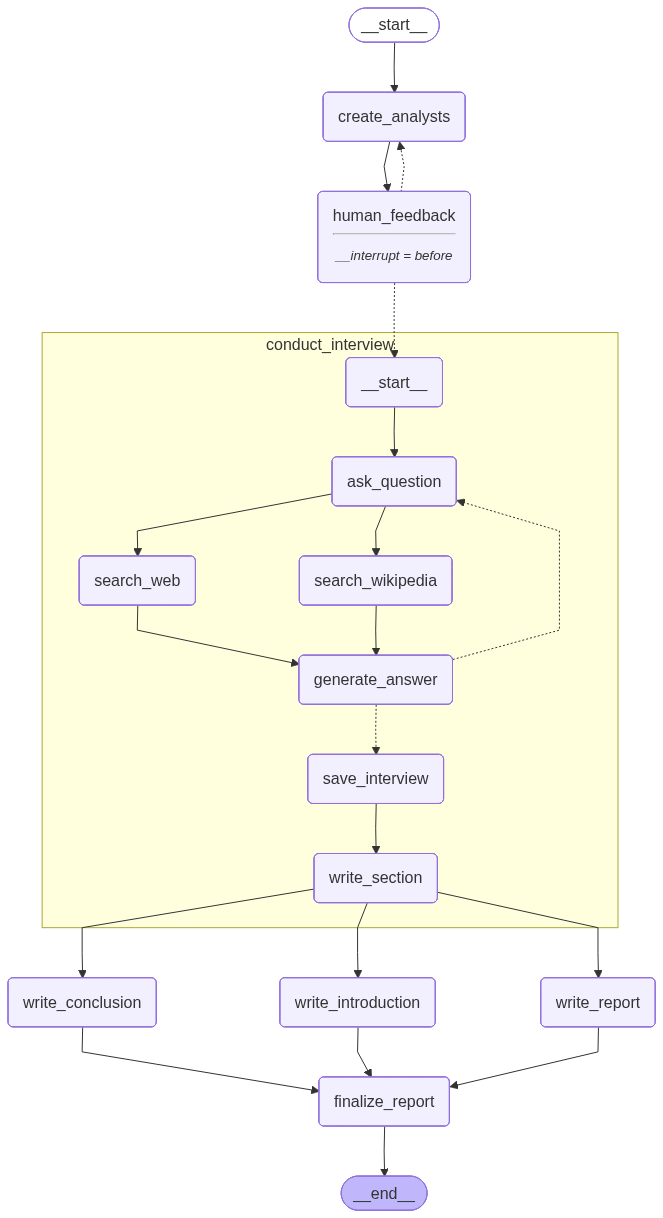

In [112]:
memory = MemorySaver()
graph = builder.compile(interrupt_before=['human_feedback'], checkpointer=memory)
display(Image(graph.get_graph(xray=1).draw_mermaid_png()))

In [113]:
max_analysts=3
topic="How can generative AI accelerate drug discovery"
thread={"configurable":{"thread_id":"1"}}


In [114]:
# Run the graph until the first interruption
for event in graph.stream({"topic":topic,"max_analysts":max_analysts}, thread, stream_mode="values"):
    analysts = event.get('analysts', '')
    if analysts:
        for analyst in analysts:
            print(f"Name: {analyst.name}")
            print(f"Affiliation: {analyst.affiliation}")
            print(f"Role: {analyst.role}")
            print(f"Description: {analyst.description}")
            print("-" * 50) 

HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"


Name: Dr. Rachel Kim
Affiliation: Stanford University
Role: AI Researcher
Description: Focuses on the application of generative AI in drug discovery, concerned with the potential of AI to accelerate the discovery of new medicines, and motivated by the desire to improve human health.
--------------------------------------------------
Name: Dr. Liam Chen
Affiliation: Pfizer
Role: Pharmaceutical Industry Expert
Description: Examines the potential of generative AI to streamline the drug development process, worried about the regulatory challenges and intellectual property issues, and driven by the need to reduce costs and increase efficiency.
--------------------------------------------------
Name: Dr. Maya Patel
Affiliation: Harvard University
Role: Ethics Specialist
Description: Investigates the ethical implications of using generative AI in drug discovery, concerned with the potential biases in AI decision-making, and motivated by the need to ensure that AI is used responsibly and for t

In [115]:
graph.update_state(thread, {"human_analyst_feedback":"along with the genetive ai in future tell me the future of indian team"}, as_node="human_feedback")

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0a75b5-d706-6ba4-8002-c69ef4e4d456'}}

In [116]:
# Run the graph until the first interruption
for event in graph.stream({"topic":topic,"max_analysts":max_analysts}, thread, stream_mode="values"):
    analysts = event.get('analysts', '')
    if analysts:
        for analyst in analysts:
            print(f"Name: {analyst.name}")
            print(f"Affiliation: {analyst.affiliation}")
            print(f"Role: {analyst.role}")
            print(f"Description: {analyst.description}")
            print("-" * 50) 

Name: Dr. Rachel Kim
Affiliation: Stanford University
Role: AI Researcher
Description: Focuses on the application of generative AI in drug discovery, concerned with the potential of AI to accelerate the discovery of new medicines, and motivated by the desire to improve human health.
--------------------------------------------------
Name: Dr. Liam Chen
Affiliation: Pfizer
Role: Pharmaceutical Industry Expert
Description: Examines the potential of generative AI to streamline the drug development process, worried about the regulatory challenges and intellectual property issues, and driven by the need to reduce costs and increase efficiency.
--------------------------------------------------
Name: Dr. Maya Patel
Affiliation: Harvard University
Role: Ethics Specialist
Description: Investigates the ethical implications of using generative AI in drug discovery, concerned with the potential biases in AI decision-making, and motivated by the need to ensure that AI is used responsibly and for t

HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"


Name: Dr. Rachel Kim
Affiliation: Stanford University
Role: AI Researcher
Description: Focuses on the application of generative AI in accelerating drug discovery, with a emphasis on molecular generation and protein-ligand binding affinity prediction.
--------------------------------------------------
Name: Dr. Rajesh Sharma
Affiliation: Indian Pharmaceutical Association
Role: Pharmaceutical Industry Expert
Description: Examines the potential impact of generative AI on the Indian pharmaceutical industry, including its potential to improve drug discovery workflows and reduce costs.
--------------------------------------------------
Name: Dr. Liam Chen
Affiliation: National Institutes of Health
Role: Computational Biologist
Description: Investigates the use of generative AI in integrating multi-omics data for drug target identification and validation, with a focus on precision medicine and personalized healthcare.
--------------------------------------------------


In [117]:
graph.update_state(thread, {"human_analyst_feedback":""}, as_node="human_feedback")

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0a75b6-60db-6991-8006-6cd04608ae9d'}}

In [118]:
graph.get_state(thread).next

('conduct_interview', 'conduct_interview', 'conduct_interview')

In [119]:
# Continue
for event in graph.stream(None, thread, stream_mode="updates"):
    print("--Node--")
    node_name = next(iter(event.keys()))
    print(node_name)

HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"


*******************************
search_query='generative AI drug discovery cost savings Indian pharmaceutical industry'


HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"


**************************************************************

search_query='generative AI in precision medicine and personalized healthcare for drug discovery'search_query='generative AI accelerate drug discovery molecular generation protein-ligand binding affinity prediction'



HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"


*******************************
search_query='How can generative AI accelerate drug discovery by generating novel molecules with specific properties and what are the potential impacts on the field of drug discovery?'


HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
Retrying request to /openai/v1/chat/completions in 1.000000 seconds
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
Retrying request to /openai/v1/chat/completions in 2.000000 seconds
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
Retrying request to /openai/v1/chat/completions in 3.000000 seconds
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
Retrying request to /openai/v1/chat/completions in 3.000000 seconds
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/

*******************************


Retrying request to /openai/v1/chat/completions in 3.000000 seconds


search_query='generative AI in Indian pharmaceutical industry and cost savings'


HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
Retrying request to /openai/v1/chat/completions in 19.000000 seconds
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
Retrying request to /openai/v1/chat/completions in 23.000000 seconds
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 413 Payload Too Large"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 413 Payload Too Large"


APIStatusError: Error code: 413 - {'error': {'message': 'Request too large for model `llama-3.3-70b-versatile` in organization `org_01hvz7yfhnfz4sdzn0d40agc3e` service tier `on_demand` on tokens per minute (TPM): Limit 12000, Requested 12246, please reduce your message size and try again. Need more tokens? Upgrade to Dev Tier today at https://console.groq.com/settings/billing', 'type': 'tokens', 'code': 'rate_limit_exceeded'}}

In [ ]:
from IPython.display import Markdown

In [ ]:
final_state = graph.get_state(thread)

In [ ]:
report = final_state.values.get('final_report')

In [ ]:
Markdown(report)